## 4 - Treino dos modelos com H2o
![Treinar com h2o](./img/imagem4.jpg "Treino dos modelos com H2o")

## 4.1 - Instalar e iniciar o H2O

In [1]:
# Importar Biblioteca
# Iniciar o h2o

import h2o
import pandas as pd
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator
import matplotlib.pyplot as plt
import os

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.12+8-LTS-286, mixed mode, sharing)
  Starting server from C:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\avlal\AppData\Local\Temp\tmpe8va304g
  JVM stdout: C:\Users\avlal\AppData\Local\Temp\tmpe8va304g\h2o_avlal_started_from_python.out
  JVM stderr: C:\Users\avlal\AppData\Local\Temp\tmpe8va304g\h2o_avlal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_avlal_x9sv4a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.984 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [2]:
# Importar Dataset

df_h2o = h2o.import_file("./data/Life_Expectancy_Clean.csv")
print(df_h2o.columns)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['Life expectancy', 'percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Income composition of resources', 'Schooling']


---

# 4.2 - Preparar os Dados

In [3]:

# Definir a variável alvo (Life expectancy) e as preditoras
target = "Life expectancy"
predictors = df_h2o.columns
predictors.remove(target)

# Verificar o tipo de variável alvo
print(f"Tipo de '{target}': {df_h2o[target].types}")


Tipo de 'Life expectancy': {'Life expectancy': 'real'}


In [4]:
# Dividir o dataset em treino (75%) e teste (25%)
train, test = df_h2o.split_frame(ratios=[0.75], seed=42)

# Confirmar o tamanho dos conjuntos
print(f"Treino: {train.nrows}, Teste: {test.nrows}")


Treino: 1400, Teste: 463


Rows:1863
Cols:9

,Life expectancy,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Income composition of resources,Schooling
type,real,real,int,int,real,int,real,real,real
mins,44.0,0.09519398214454734,2.0,3.0,0.74,2.0,0.986320399036006,0.279,0.0
mean,69.99511540526034,5.060120267302423,80.75523349436394,84.80139559849705,5.790128824476651,85.1610305958132,7.498668277834215,0.6651734296831573,12.285668276972626
maxs,89.0,9.850210639445612,99.0,99.0,14.39,99.0,11.688337722433907,0.936,20.7
sigma,8.605838373371093,1.9087961354124805,25.03160608419616,21.723836892937136,2.342047559678264,21.10779569517291,1.7828905793937695,0.14705277534913574,2.8786584011745155
zeros,0,0,0,0,0,0,0,0,5
missing,0,0,0,0,0,0,0,0,0
0,65.0,4.280542258460885,65.0,6.0,8.16,65.0,6.372054843111785,0.479,10.1
1,59.9,4.311115607917084,62.0,58.0,8.18,62.0,6.419500529079097,0.476,10.0
2,59.9,4.307023452400663,64.0,62.0,8.13,64.0,6.450067459449026,0.47,9.9


c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


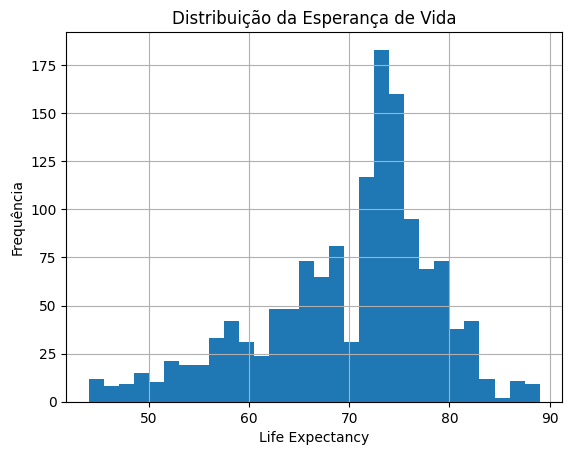

Life expectancy,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Income composition of resources,Schooling
65,4.28054,65,6,8.16,65,6.37205,0.479,10.1
59.9,4.31112,62,58,8.18,62,6.4195,0.476,10
59.9,4.30702,64,62,8.13,64,6.45007,0.47,9.9
59.5,4.37178,67,67,8.52,67,6.50871,0.463,9.8
59.2,2.09151,68,68,7.87,68,4.16724,0.454,9.5
58.8,4.39048,66,66,9.2,66,6.31776,0.448,9.2
58.6,4.05633,63,63,9.42,63,6.10232,0.434,8.9
58.1,3.29116,64,64,8.33,64,5.92522,0.433,8.7
57.5,2.47739,63,63,6.73,63,5.91576,0.415,8.4
57.3,2.89986,64,58,7.43,58,5.61153,0.405,8.1


In [5]:
# Estatísticas descritivas
df_h2o.describe()

# Visualizar distribuições (com H2o)
import matplotlib.pyplot as plt
train.as_data_frame()[target].hist(bins=30)
plt.title("Distribuição da Esperança de Vida")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequência")
plt.show()

df_h2o.show()


## 4.3 - Treino e Avaliação modelos de regressão (Supervionados)

### Treino com Distributed Random Forest (DRF)

In [6]:
# Inicializar o modelo DRF
model_default = H2ORandomForestEstimator(seed=42)

# Treinar o modelo com as variáveis preditoras e a variável alvo
model_default.train(x=predictors, y=target, training_frame=train)

# Exibir as métricas do modelo no conjunto de treino
model_default.show()


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1733867676403_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          528228                 18           20           19.86         780           879           837.88

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 11.590749769035948
RMSE: 3.404519021688078
MAE: 2.424054070757306
RMSLE: 0.05369586755580495
Mean Residual Deviance: 11.590749769035948

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-10 21:54:39  0.020 sec   0.0                nan                 nan                 nan
     2024-12-10 21:54:39  0.262 sec   1.0                5.693263505648419   3.643272385202162   32.413249344748124
     2024-12-10 21:54:39  0.303 sec   2.0                5.582106714940865   3.6405715714503644  31.1599153769879
     2024-12-10 21:54:39  0.346 sec   3.0                5.171473050008344   3.4756864570915433  26.744133506962605
     2024-12-10 21:54:39  0.373 sec   4.0                4.953071842680987   3.3720191700605047  24.53292067875923
     2024-12-10 21:54:39  0.405 sec   5.0                4.84887486248491    3.3164396909702667  23.51158743203805
     2024-12-10 21:54:39  0.438 sec   6.0                4.659498246091576   3.206073433956726   21.710923905330468
     2024-12-10 21:54:39  0.468 sec   7.0                4.471268406075026   3.0809028605532505  19.992241159164703
     2024-12-10 21:54:39  0.493 sec   8.0                4.28614073418456    2.98415846812907    18.37100239323616
     2024-12-10 21:54:39  0.515 sec   9.0                4.24174231820924    2.956411920812079   17.9923778940871
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-10 21:54:40  0.986 sec   41.0               3.434828232770809   2.4480346755742928  11.798044988639438
     2024-12-10 21:54:40  0.998 sec   42.0               3.430084907335649   2.4496183950734016  11.765482471531808
     2024-12-10 21:54:40  1.009 sec   43.0               3.422448249134699   2.4461575176087895  11.713152018005164
     2024-12-10 21:54:40  1.021 sec   44.0               3.422592774680528   2.4465930417267594  11.714141301295355
     2024-12-10 21:54:40  1.033 sec   45.0               3.427450077680812   2.447968452950048   11.747414034994202
     2024-12-10 21:54:40  1.045 sec   46.0               3.425060866350039   2.4428053951110043  11.73104193820248
     2024-12-10 21:54:40  1.058 sec   47.0               3.40916842466727    2.427197839273512   11.622429347748314
     2024-12-10 21:54:40  1.069 sec   48.0               3.4044850891056466  2.425266591702152   11.590518721942683
     2024-12-10 21:54:40  1.082 sec   49.0               3.399074843643311   2.419483100295574   11.553709792688798
     2024-12-10 21:54:40  1.092 sec   50.0               3.404519021688078   2.424054070757306   11.590749769035948
[51 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance    percentage
-------------------------------  ---------------------  -------------------  ------------
Income composition of resources  1.37949e+06            1                    0.343885
Schooling                        1.08818e+06            0.788823             0.271264
percentage expenditure           432472                 0.313501             0.107808
GDP                              413101                 0.299459 

### Treino com Gradient Boosting Machine (GBM)

In [7]:
# Inicializar o modelo GBM com configurações padrão
model_gbm = H2OGradientBoostingEstimator(seed=42)

# Treinar o modelo com as variáveis preditoras e a variável alvo
model_gbm.train(x=predictors, y=target, training_frame=train)

# Exibir as métricas do modelo no conjunto de treino
model_gbm.show()


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1733867676403_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          16363                  5            5            5             8             30            21.4

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6.1086572917863355
RMSE: 2.471569803138551
MAE: 1.8203105354309081
RMSLE: 0.03785186374295363
Mean Residual Deviance: 6.1086572917863355

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-10 21:54:40  0.003 sec   0.0                8.644424880597851   6.9003105991659375  74.72608151629919
     2024-12-10 21:54:40  0.039 sec   1.0                7.931599240722905   6.3323741694859095  62.91026651543617
     2024-12-10 21:54:40  0.051 sec   2.0                7.301525117527041   5.829260591779437   53.312269041878274
     2024-12-10 21:54:40  0.061 sec   3.0                6.743059440322701   5.379016639164516   45.46885061572509
     2024-12-10 21:54:40  0.071 sec   4.0                6.255947541316643   4.985489011492048   39.136879639705754
     2024-12-10 21:54:40  0.080 sec   5.0                5.824405161163915   4.628249849591937   33.92369548139285
     2024-12-10 21:54:40  0.088 sec   6.0                5.444568149993564   4.314506255558559   29.64332233992433
     2024-12-10 21:54:40  0.096 sec   7.0                5.110219545378865   4.033162277766636   26.11434380197217
     2024-12-10 21:54:40  0.104 sec   8.0                4.817842950218314   3.7880133247375487  23.211610692968314
     2024-12-10 21:54:40  0.112 sec   9.0                4.542489017693481   3.558027411869594   20.634206475865888
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-10 21:54:41  0.290 sec   41.0               2.5625008674874326  1.8856185477120535  6.566410695873845
     2024-12-10 21:54:41  0.295 sec   42.0               2.5461158258495824  1.875032149723598   6.482705798641701
     2024-12-10 21:54:41  0.300 sec   43.0               2.53488365234475    1.8681099264962333  6.425635130924659
     2024-12-10 21:54:41  0.307 sec   44.0               2.5273363668571505  1.861492827279227   6.387429111238702
     2024-12-10 21:54:41  0.312 sec   45.0               2.5147719287305805  1.8529686737060547  6.324077853531323
     2024-12-10 21:54:41  0.317 sec   46.0               2.5045654052451582  1.8462081963675363  6.272847869150843
     2024-12-10 21:54:41  0.321 sec   47.0               2.4998529847204023  1.842907829284668   6.249264945215504
     2024-12-10 21:54:41  0.328 sec   48.0               2.485778441729864   1.8319980675833565  6.17909446136895
     2024-12-10 21:54:41  0.333 sec   49.0               2.4803299344196525  1.8276633180890764  6.152036583578197
     2024-12-10 21:54:41  0.338 sec   50.0               2.471569803138551   1.8203105354309081  6.1086572917863355
[51 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance    percentage
-------------------------------  ---------------------  -------------------  ------------
Income composition of resources  430576                 1                    0.851586
GDP                              19909.8                0.0462398            0.0393772
Schooling                        19221.2                0.0446408            0.0380155
Total expenditure                14665.2             

---
## 4.4 Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?

Para respondermos a esta questão, vamos assim precisar das variáveis relacionadas aos fatores socioeconómicos, usando o modelo Random Forest:

* GDP (Produto Interno Bruto)
* Income composition of resources

Estas serão as variáveis preditivas (X) e a variável alvo continuará a ser Life expectancy.

drf Model Build progress: |

c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Impacto dos Fatores Socioeconômicos no Desempenho
Mean Absolute Error (MAE): 2.71
Mean Squared Error (MSE): 14.72
R² Score: 0.80


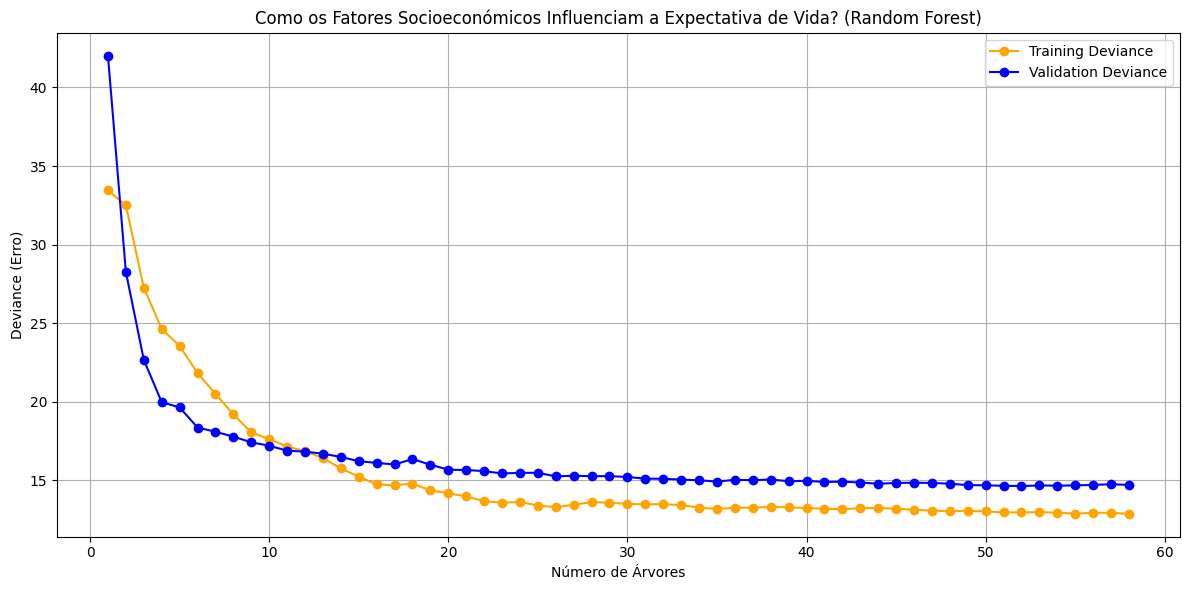

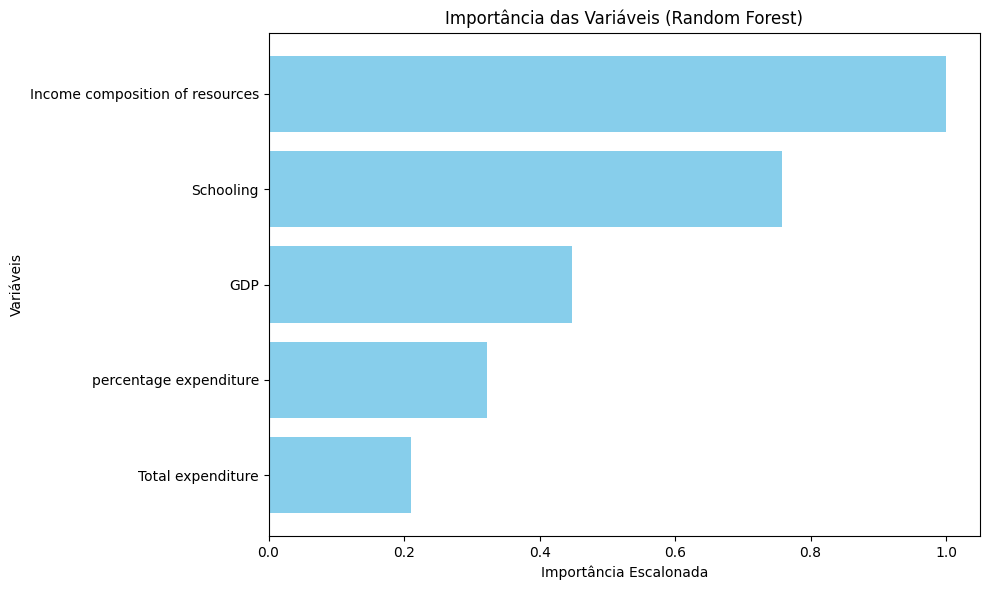

In [8]:
# Selecionar as variáveis socioeconómicas
socioeconomic_predictors = ['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']
target = 'Life expectancy'

# Preparar os dados para treino e teste
X1 = df_h2o[socioeconomic_predictors]
y1 = df_h2o[target]

# Dividir os dados
train1, test1 = df_h2o.split_frame(ratios=[0.75], seed=42)

# Configurar o modelo Random Forest
rf_model1 = H2ORandomForestEstimator(
    ntrees=300, 
    max_depth=20,
    stopping_rounds=5, 
    stopping_metric='deviance', 
    stopping_tolerance=0.001, 
    seed=42
)

# Treinar o modelo com os dados de treino
rf_model1.train(x=socioeconomic_predictors, y=target, training_frame=train1, validation_frame=test1)

# Avaliar o modelo no conjunto de validação
performance_rf1 = rf_model1.model_performance(test1)

# Obter as métricas de desempenho
mae = performance_rf1.mae()
mse = performance_rf1.mse()
r2 = performance_rf1.r2()

# Apresentar os resultados
print("="*50)
print("Impacto dos Fatores Socioeconômicos no Desempenho")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("="*50)

# Obter o histórico de pontuação do modelo
scoring_history = rf_model1.scoring_history()

# Criar o gráfico de desvio (deviance)
plt.figure(figsize=(12, 6))

# Adicionar linha para o desvio no treino
plt.plot(scoring_history['number_of_trees'], scoring_history['training_deviance'], label="Training Deviance", color="orange", marker="o")

# Adicionar linha para o desvio na validação (teste)
if 'validation_deviance' in scoring_history.columns:
    plt.plot(scoring_history['number_of_trees'], scoring_history['validation_deviance'], label="Validation Deviance", color="blue", marker="o")

# Configurar o gráfico
plt.title("Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida? (Random Forest)")
plt.xlabel("Número de Árvores")
plt.ylabel("Deviance (Erro)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Obter a importância das variáveis
importance = rf_model1.varimp(use_pandas=True)

# Criar gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importance['variable'], importance['scaled_importance'], color="skyblue")
plt.title("Importância das Variáveis (Random Forest)")
plt.xlabel("Importância Escalonada")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis()  # Inverter a ordem das variáveis no eixo Y
plt.tight_layout()
plt.show()


In [9]:
import os

# Diretório onde o modelo será salvo
save_dir = "./models"
custom_model_name = "rf_socioeconomic_model"

# Caminho final desejado para o modelo
model_path_final = os.path.join(save_dir, custom_model_name)

# Salvar o modelo no diretório especificado
model_path = h2o.save_model(model=rf_model1, path=save_dir, force=True)

# Verificar se o arquivo já existe e sobrescrever
if os.path.exists(model_path_final):
    os.remove(model_path_final)  # Remove o arquivo existente

# Renomear automaticamente para o nome personalizado
os.rename(model_path, model_path_final)

print(f"Modelo salvo com o nome personalizado em: {model_path_final}")



Modelo salvo com o nome personalizado em: ./models\rf_socioeconomic_model


---
## 4.5 Qual o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida?

Para respondermos à questão, vamos assim precisar das variáveis relacionadas às taxas de vacinação usando o modelo Random Forest:

* Hepatitis B
* Polio
* Diphtheria
* percentage expenditure (variável)

Estas serão as variáveis preditivas (X) e a variável alvo continuará a ser Life expectancy.

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Impacto das Taxas de Vacinação no Desempenho
Mean Absolute Error (MAE): 5.77
Mean Squared Error (MSE): 62.19
R² Score: 0.13


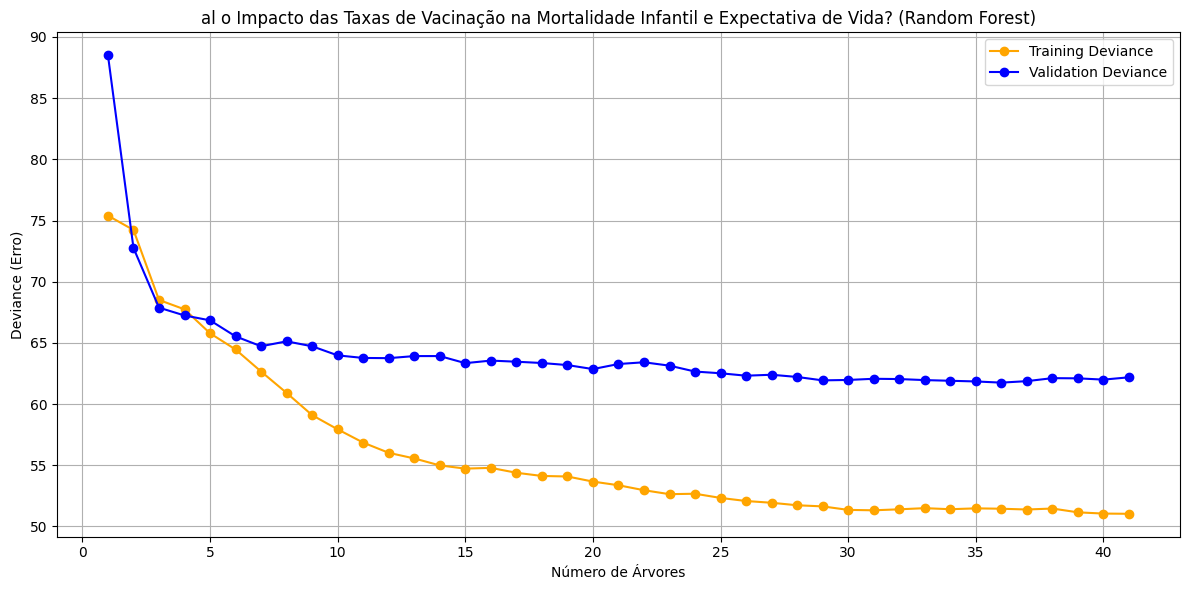

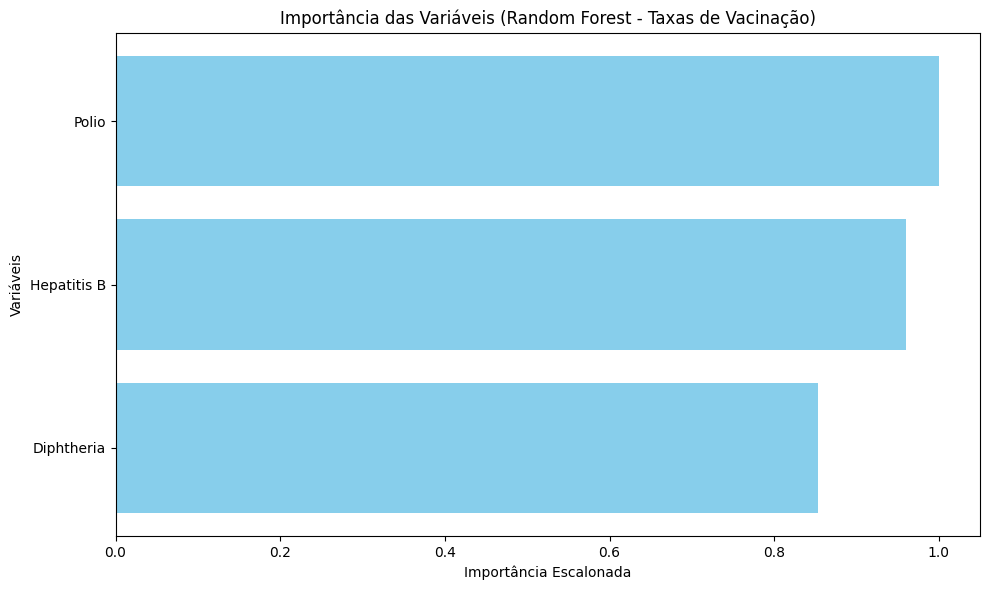

In [10]:
# Selecionar as variáveis relacionadas às taxas de vacinação
vaccination_predictors = ['Hepatitis B', 'Polio', 'Diphtheria']

target = 'Life expectancy'

# Configurar o modelo Random Forest
rf_model2 = H2ORandomForestEstimator(
    ntrees=300, 
    max_depth=20,
    stopping_rounds=5, 
    stopping_metric='deviance', 
    stopping_tolerance=0.001, 
    seed=42
)

# Treinar o modelo com os dados de treino e validação
rf_model2.train(x=vaccination_predictors, y=target, training_frame=train1, validation_frame=test1)

# Avaliar o modelo no conjunto de validação
performance_rf2 = rf_model2.model_performance(test1)

# Obter as métricas de desempenho
mae = performance_rf2.mae()
mse = performance_rf2.mse()
r2 = performance_rf2.r2()

# Apresentar os resultados
print("="*50)
print("Impacto das Taxas de Vacinação no Desempenho")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("="*50)

# Obter o histórico de pontuação do modelo
scoring_history = rf_model2.scoring_history()

# Criar o gráfico de desvio (deviance)
plt.figure(figsize=(12, 6))

# Adicionar linha para o desvio no treino
plt.plot(scoring_history['number_of_trees'], scoring_history['training_deviance'], label="Training Deviance", color="orange", marker="o")

# Adicionar linha para o desvio na validação (teste)
if 'validation_deviance' in scoring_history.columns:
    plt.plot(scoring_history['number_of_trees'], scoring_history['validation_deviance'], label="Validation Deviance", color="blue", marker="o")

# Configurar o gráfico
plt.title("al o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida? (Random Forest)")
plt.xlabel("Número de Árvores")
plt.ylabel("Deviance (Erro)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Obter a importância das variáveis
importance = rf_model2.varimp(use_pandas=True)

# Criar gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importance['variable'], importance['scaled_importance'], color="skyblue")
plt.title("Importância das Variáveis (Random Forest - Taxas de Vacinação)")
plt.xlabel("Importância Escalonada")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [11]:
import os

# Diretório onde o modelo será salvo
save_dir = "./models"
custom_model_name = "rf_vaccination_model"

# Caminho final desejado para o modelo
model_path_final = os.path.join(save_dir, custom_model_name)

# Salvar o modelo no diretório especificado
model_path = h2o.save_model(model=rf_model2, path=save_dir, force=True)

# Verificar se o arquivo já existe e sobrescrever
if os.path.exists(model_path_final):
    os.remove(model_path_final)  # Remove o arquivo existente

# Renomear automaticamente para o nome personalizado
os.rename(model_path, model_path_final)

print(f"Modelo salvo com o nome personalizado em: {model_path_final}")




Modelo salvo com o nome personalizado em: ./models\rf_vaccination_model


In [12]:
# Fazer previsões no conjunto de teste1 e guardar como CSV
predictions = rf_model1.predict(test1).as_data_frame()
test1_data = test1.as_data_frame()
test1_data['Predicted Life Expectancy'] = predictions['predict']

test1_data.to_csv("./data/socioeconomic_predictions.csv", index=False)

print("Previsões e dados de teste salvos como CSV.")

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Previsões e dados de teste salvos como CSV.


c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [13]:
# Fazer previsões no conjunto de teste e salvar como CSV
predictions = rf_model2.predict(test1).as_data_frame() 
test2_data = test1.as_data_frame()
test2_data['Predicted Life Expectancy'] = predictions['predict']  

# Salvar o conjunto de teste e as previsões como CSV
test2_data.to_csv("./data/vaccination_predictions.csv", index=False)

print("Previsões e dados de teste salvos como CSV (Vacinação).")


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Previsões e dados de teste salvos como CSV (Vacinação).


c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\avlal\Desktop\Life-Expectancy(2)\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
